# Analyzing the generated graphs

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
import sys
import os

sys.path.extend(['./..'])  # have to add the project path manually to the Python path
os.chdir('./..')

In [3]:
from src.VRG import VRG
from src.utils import load_pickle
from src.graph_stats import GraphStats
from src.graph_comparison import GraphPairCompare

sys path:  ['/Users/ssikdar/projects/VRG-experiments/analysis', '/Users/ssikdar/miniconda3/envs/VRG/lib/python37.zip', '/Users/ssikdar/miniconda3/envs/VRG/lib/python3.7', '/Users/ssikdar/miniconda3/envs/VRG/lib/python3.7/lib-dynload', '', '/Users/ssikdar/miniconda3/envs/VRG/lib/python3.7/site-packages', '/Users/ssikdar/miniconda3/envs/VRG/lib/python3.7/site-packages/IPython/extensions', '/Users/ssikdar/.ipython', './..', './../', './../../']


In [4]:
def read_graph(gname):
    g = nx.read_edgelist(f'./src/tmp/graphs/{gname}.g', nodetype=int, create_using=nx.Graph())
    if not nx.is_connected(g):
        nodes_lcc = max(nx.connected_components(g), key=len)
        g = g.subgraph(nodes_lcc).copy()
    name = g.name
    g = nx.convert_node_labels_to_integers(g)
    g.name = name
    return g

In [14]:
def get_rows(name, orig_g, strategy, gen_graphs, frac=None):
    cols = ['name', 'orig_n', 'orig_m', 'trial', 'strategy', 'frac', 'gen_n', 'gen_m', 'degree_js', 'pagerank_js']

    rows = {col: [] for col in cols}
    orig_gstats = GraphStats(orig_g)
    
    for i, gen_g in enumerate(gen_graphs):
        print(f'reading {strategy} {frac} {name} #{i}', end='\t', flush=True)
        rows['name'].append(name)
        rows['orig_n'].append(orig_g.order())
        rows['orig_m'].append(orig_g.size())
        rows['trial'].append(i + 1)
        rows['strategy'].append(strategy)
        if strategy == 'iso':
            frac = 110
        elif strategy == 'random':
            frac = -10
        elif strategy == 'greedy':
            frac = frac
        rows['frac'].append(frac)
        rows['gen_n'].append(gen_g.order())
        rows['gen_m'].append(gen_g.size())
        
        gen_gstats = GraphStats(gen_g)
        gpc = GraphPairCompare(orig_gstats, gen_gstats)
        rows['degree_js'].append(gpc.degree_js())
        rows['pagerank_js'].append(gpc.pagerank_js())
        rows['lambda_dist'].append(gpc.lambda_dist())

    return rows

In [40]:
def get_greedy_df(name, orig_g):
    dfs = []
    for frac in range(0, 110, 10):
        greedy_graphs = load_pickle(f'./dumps/graphs/{name}/NCE_greedy_5_{frac}.pkl.gz')
        rows_greedy = get_rows(name=name, orig_g=orig_g, strategy='greedy', gen_graphs=greedy_graphs, frac=frac)
        df = pd.DataFrame(rows_greedy)
        dfs.append(df)
    return pd.concat(dfs)

In [38]:
def get_df(name, orig_g, random_graphs, iso_graphs):
    rows_random = get_rows(name=name, orig_g=orig_g, strategy='random', gen_graphs=random_graphs)
    rows_iso = get_rows(name=name, orig_g=orig_g, strategy='iso', gen_graphs=iso_graphs)

    df_greedy = get_greedy_df(name, orig_g)
    df_random = pd.DataFrame(rows_random)
    df_iso = pd.DataFrame(rows_iso)
    
    df = pd.concat([df_random, df_iso, df_greedy])
    return df 

In [7]:
plt.rcParams['figure.figsize'] = [10, 7]

---

# Karate and EuCore

## Load grammar and the generated graphs

In [63]:
karate_orig = read_graph('karate')
eucore_orig = read_graph('eucore')
grqc_orig = read_graph('grqc')

In [61]:
# karate_random_graphs = load_pickle('./dumps/graphs/karate/VRG_random_5.pkl.gz')
# karate_iso_graphs = load_pickle('./dumps/graphs/karate/NCE_iso_5.pkl.gz')

# eucore_random_graphs = load_pickle('./dumps/graphs/eucore/VRG_random_5.pkl.gz')
# eucore_iso_graphs = load_pickle('./dumps/graphs/eucore/NCE_iso_5.pkl.gz')

grqc_random_graphs = load_pickle('./dumps/graphs/grqc/VRG_random_5.pkl.gz')
grqc_iso_graphs = load_pickle('./dumps/graphs/grqc/NCE_iso_5.pkl.gz')

In [52]:
karate_df

,name,orig_n,orig_m,trial,strategy,frac,gen_n,gen_m,degree_js,pagerank_js
0,karate,34,78,1,random,-10,35,65,0.504402,NaN
1,karate,34,78,2,random,-10,37,76,0.170996,NaN
2,karate,34,78,3,random,-10,36,78,0.215422,NaN
3,karate,34,78,4,random,-10,34,69,0.150572,NaN
4,karate,34,78,5,random,-10,34,71,0.141542,NaN
...,...,...,...,...,...,...,...,...,...,...
45,karate,34,78,46,greedy,100,34,70,0.145615,NaN
46,karate,34,78,47,greedy,100,34,69,0.140484,NaN
47,karate,34,78,48,greedy,100,34,70,0.205282,NaN
48,karate,34,78,49,greedy,100,34,69,0.198390,NaN


In [50]:
karate_df.head()

,name,orig_n,orig_m,trial,strategy,frac,gen_n,gen_m,degree_js,pagerank_js
0,karate,34,78,1,random,10,35,65,0.504402,NaN
1,karate,34,78,2,random,10,37,76,0.170996,NaN
2,karate,34,78,3,random,10,36,78,0.215422,NaN
3,karate,34,78,4,random,10,34,69,0.150572,NaN
4,karate,34,78,5,random,10,34,71,0.141542,NaN


In [13]:
karate_df = get_df(name='karate', orig_g=karate_orig, random_graphs=karate_random_graphs, iso_graphs=karate_iso_graphs)
eucore_df = get_df(name='eucore', orig_g=eucore_orig, random_graphs=eucore_random_graphs, iso_graphs=eucore_iso_graphs)
grqc_df = get_df(name='grqc', orig_g=grqc_orig, random_graphs=grqc_random_graphs, iso_graphs=grqc_iso_graphs)

reading random karate #0	reading random karate #1	reading random karate #2	reading random karate #3	reading random karate #4	reading random karate #5	reading random karate #6	reading random karate #7	reading random karate #8	reading random karate #9	reading random karate #10	reading random karate #11	reading random karate #12	reading random karate #13	reading random karate #14	reading random karate #15	reading random karate #16	reading random karate #17	reading random karate #18	reading random karate #19	reading random karate #20	reading random karate #21	reading random karate #22	reading random karate #23	reading random karate #24	reading random karate #25	reading random karate #26	reading random karate #27	reading random karate #28	reading random karate #29	reading random karate #30	reading random karate #31	reading random karate #32	reading random karate #33	reading random karate #34	reading random karate #35	reading random karate #36	reading random karate #37	reading random karate 

In [21]:
df = pd.concat([karate_df, eucore_df, grqc_df])

In [16]:
df.head()

,name,orig_n,orig_m,trial,strategy,frac,gen_n,gen_m,degree_js,pagerank_js
0,karate,34,78,1,random,-10,35,65,0.504402,0.677115
1,karate,34,78,2,random,-10,37,76,0.170996,0.725233
2,karate,34,78,3,random,-10,36,78,0.215422,0.715960
3,karate,34,78,4,random,-10,34,69,0.150572,0.437527
4,karate,34,78,5,random,-10,34,71,0.141542,0.558398


In [17]:
df.to_csv('./analysis/karate-eucore-grqc-comparison.csv', index=False)

In [18]:
df['scaled_n'] = df['gen_n'] / df['orig_n']
df['scaled_m'] = df['gen_m'] / df['orig_m']

In [ ]:
df.head()

## bar plot number of nodes

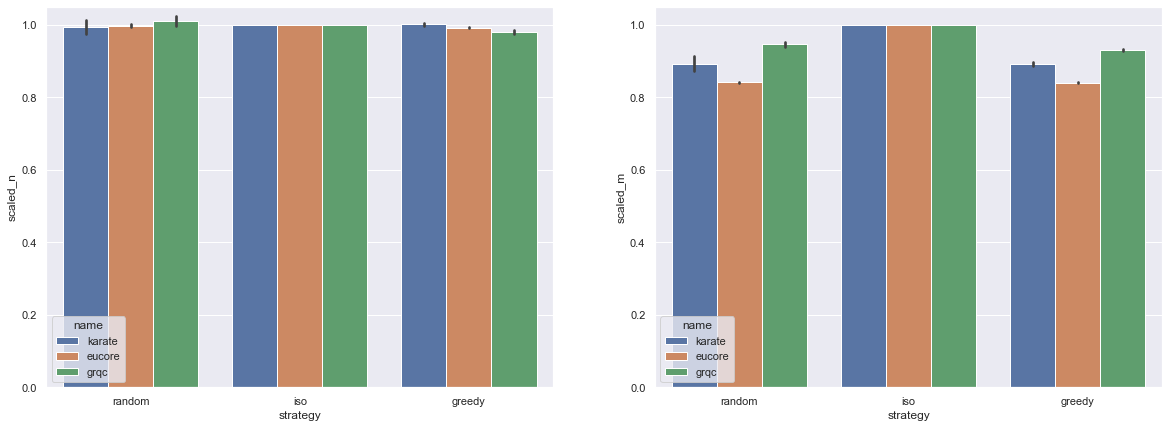

In [19]:
plt.rcParams['figure.figsize'] = [20, 7]

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
ax1.set_ylim((0, 1.05))
ax2.set_ylim((0, 1.05))
sns.barplot(x='strategy', y='scaled_n', hue='name', data=df, ax=ax1);
sns.barplot(x='strategy', y='scaled_m', hue='name', data=df, ax=ax2);

# more sophisticated graph measures

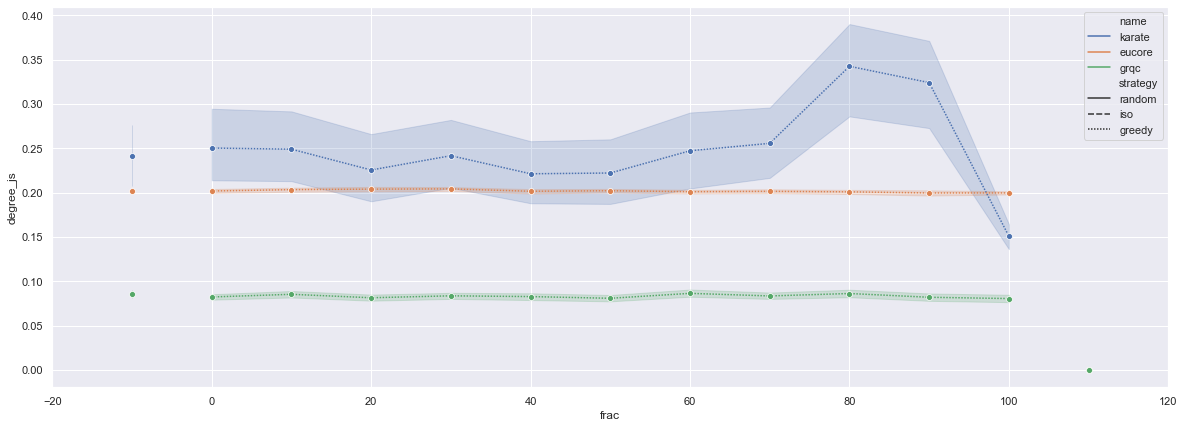

In [20]:
df = pd.concat([karate_df, eucore_df, grqc_df])
plt.rcParams['figure.figsize'] = [20, 7]
ax = plt.gca()
ax.set_xlim(-20, 120)
sns.lineplot(x='frac', y='degree_js', hue='name', style='strategy', data=df, marker='o');

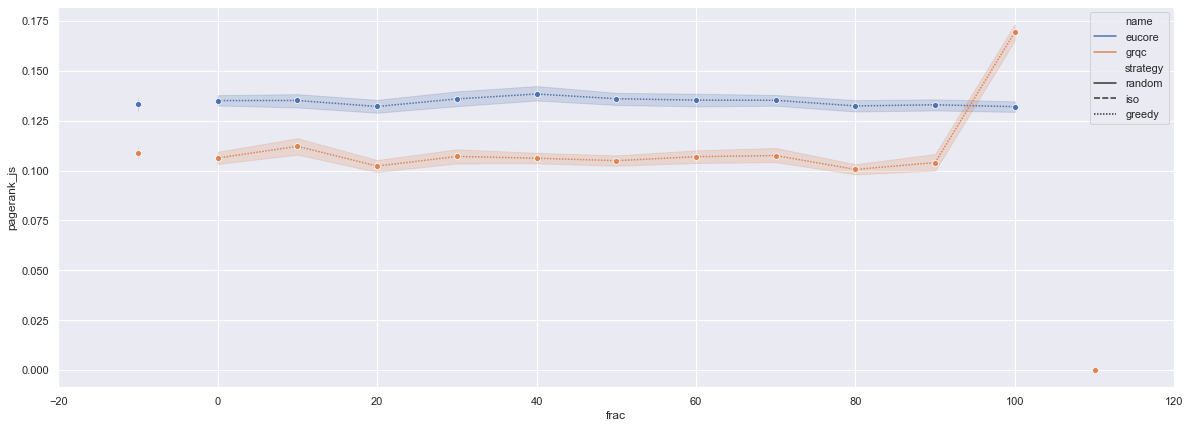

In [23]:
plt.rcParams['figure.figsize'] = [20, 7]
ax = plt.gca()
ax.set_xlim(-20, 120)
sns.lineplot(x='frac', y='pagerank_js', hue='name', style='strategy', data=df[df.name!='karate'], marker='o');

In [ ]:
plt.rcParams['figure.figsize'] = [20, 7]

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3)
# ax1.set_ylim((0, 1.05))
# ax2.set_ylim((0, 1.05))
# ax1.set_yscale('log')
sns.barplot(x='strategy', y='deltacon', hue='name', data=df, ax=ax1);
sns.barplot(x='strategy', y='cvm_degree', hue='name', data=df, ax=ax2);